In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor


#Creating our dataframe here:

df = pd.read_csv('profiles.csv')
#print(df.job.value_counts())

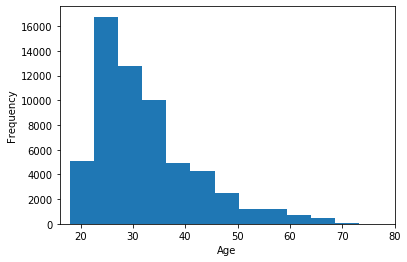

In [2]:
#importing matplotlib and creating the agehistogram

import matplotlib.pyplot as plt

plt.hist(df.age, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)
plt.show()

In [3]:
###unique zodiac signs and counts:###

print(df.sign.value_counts())

###Our questions: can we predict - classify - a person's Zodiac sign based on his/her drinking, smoking, drugs, and essays?###

gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1692
libra and it&rsquo;s fun to think about          1649
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1597
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
libra but it doesn&rsquo;t matter                1408
aquarius but it doesn&rsquo;t matter             1408
capricorn and it&rsquo;s fun

In [4]:
#Transforming categorical data to numerical data:

def column_mapping(column):
    dct = {}
    mapping_column = column.value_counts().reset_index()
    for i in range(len(mapping_column)):
        dct[mapping_column.loc[i][0]] = i
    return dct

df['drinks_code'] = df.drinks.map(column_mapping(df.drinks))
df['smokes_code'] = df.smokes.map(column_mapping(df.smokes))
df['drugs_code'] = df.drugs.map(column_mapping(df.drugs))


In [5]:
essay_columns = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]

#Removing the NaNs:
df[essay_columns] = df[essay_columns].replace(np.nan, '', regex=True)

#Adding column; Combining the essays:
df['all_essays'] = df[essay_columns].apply(lambda x: ' '.join(x), axis=1)

#Adding column; Length of combined essays:
df['essay_len'] = df['all_essays'].apply(lambda x: len(x))

#Adding column; average word length of combined essays:
df['avg_word_length'] = df['all_essays'].apply(lambda x: 
                                                   sum(len(word) for word in x.split()) / len(x.split()) \
                                                   if len(x.split()) > 0 else 0)

#Adding column; frequency of the word 'I' or 'me' in an essay
df['i_me_frequency'] = df['all_essays'].apply(lambda x: x.split().count('I') + x.split().count('me'))
                                            
df.head()

#Note, we could have also cleaned the text more by removing punctuations, but I figured I would stick to the instructions.

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,smokes,speaks,status,drinks_code,smokes_code,drugs_code,all_essays,essay_len,avg_word_length,i_me_frequency
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,sometimes,english,single,0.0,1.0,0.0,about me:<br />\n<br />\ni would love to think...,2644,4.453608,6
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,,...,no,"english (fluently), spanish (poorly), french (...",single,2.0,0.0,1.0,i am a chef: this is what that means.<br />\n1...,1453,4.215827,1
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,no,"english, french, c++",available,0.0,0.0,NaN,"i'm not ashamed of much, but writing public te...",5517,5.212838,3
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,no,"english, german (poorly)",single,0.0,0.0,NaN,i work in a library and go to school. . . read...,477,5.012658,0
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,no,english,single,0.0,0.0,0.0,hey how's it going? currently vague on the pro...,725,5.269565,0


In [6]:
from sklearn.preprocessing import MinMaxScaler

feature_data = df[['smokes_code', 'drinks_code', 'drugs_code', 'essay_len', 'avg_word_length']]


x = feature_data.values
min_max_scaler = MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x)


feature_data = pd.DataFrame(x_scaled, columns=feature_data.columns)

feature_data.head()

#print(len(df)) is 59946
#print(len(df.dropna())) is 7127

#I did the top two prints to compare the current df row counts vs the counts if we get rid of all NaN values.

#Removing nulls will result in a huge drop in our data size, which will definitely affect the quality of our Models' predictions.
#This issue creates numerous scenarios in which we can take the next step of our project, that is creating the Models.
#For example, one way is to replace NaN values of certain columns that we think could most likely be equivalent to Zero.
#However, I thought this could mean that we are being bias or manipulative to the nature of the data.

#I can go on and criticize every possible scenario here, but I think the optimal way to go forward with this project is to
#create different data frames for each model we are building, and dropping the null values of the columns that are needed for 
#that specific model only. This will limit the number of rows we will sacrifice compared to dropping all nulls from the whole
#data frame at once, which will leave us with 7127 rows only.

#For example, our first model will be built to answer the question: Can we predict sex with education level and income??
#We can drop NaNs here for only the sex, education level and income columns, leaving us with maximum rows to work with without 
#manipulating the nature of the data. Using this method, we will also not drop rows that has sufficient answers for the sex, 
#education, and income columns.


,smokes_code,drinks_code,drugs_code,essay_len,avg_word_length
0,0.25,0.0,0.0,0.027372,0.003549
1,0.00,0.4,0.5,0.015000,0.003359
2,0.00,0.0,NaN,0.057215,0.004154
3,0.00,0.0,NaN,0.004861,0.003994
4,0.00,0.0,0.0,0.007438,0.004199


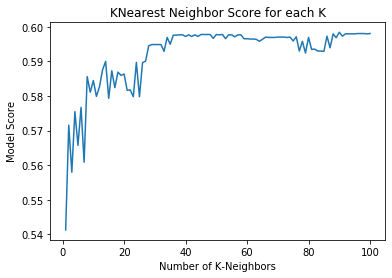

K-Nearest Neighbor Model Scores: Accuary 0.60 | Recall 0.23 | Precision 0.53


In [25]:
#CLASSIFICATION MODELS:
#Question: Can we predict sex with education level and income???
#I believe Naive Bayes Classifier is not a valid model for this type of question, so we will go with KNN and SVC:



df['education_code'] = df.education.map(column_mapping(df.education))
df['sex_code'] = df.sex.map(column_mapping(df.sex))

model_df = df[['sex_code', 'education_code', 'income']].dropna()
feature_data = model_df[['education_code', 'income']]
feature_labels = model_df['sex_code']

x = feature_data.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
feature_data = pd.DataFrame(x_scaled, columns=feature_data.columns)

X_train, X_test, y_train, y_test = train_test_split(feature_data, feature_labels, test_size=0.2, random_state=42)

k_scores = []
for k in range(1, 101):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    k_scores.append(classifier.score(X_test, y_test))

    


plt.plot(range(1, 101), k_scores)
plt.xlabel('Number of K-Neighbors')
plt.ylabel('Model Score')
plt.title('KNearest Neighbor Score for each K')
plt.show()

classifier = KNeighborsClassifier(n_neighbors=45)
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)
print('K-Nearest Neighbor Model Scores: Accuary %.2f | Recall %.2f | Precision %.2f' % (accuracy_score(y_test, y_predict),
                                                                                        recall_score(y_test, y_predict),
                                                                                        precision_score(y_test, y_predict)))


#I know we can get the exact optimal K neighbor by creating a dictionary of score values for each neighbor key... 
#I truly have no time, so I just eyeballed the chart which seems that 40-78 is where the maximum score is.

In [26]:
##Answer B)Support Vector Machines Model:

classifier = SVC(kernel='rbf', gamma=2, C=0.8)
#We can optimize gamma and C by running a double iteration and finding the optimal levels for both.
#However, I did a few manually and saw that score was not changing at all in this particular training.


classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

print('SVC Model Scores: Accuary %.2f | Recall %.2f | Precision %.2f' % (accuracy_score(y_test, y_predict),
                                                                          recall_score(y_test, y_predict),
                                                                          precision_score(y_test, y_predict)))

SVC Model Scores: Accuary 0.59 | Recall 0.00 | Precision 0.00


C:\Users\MSI\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


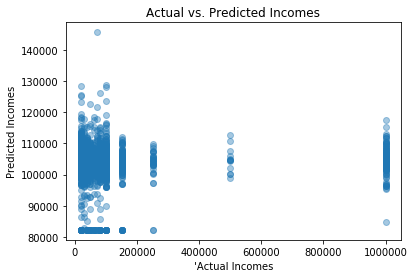

In [47]:
#REGRESSION MODELS:
#Question: Can we predict income with length of essays and average word length?
#I believe both Multiple Linear Regression and KNearest Regressor are valid models for this question:

#1) Multi-Linear Regression Model:

model_df = df[['income', 'essay_len', 'avg_word_length']].dropna()
model_df = model_df[(model_df['income'] >= 0)]
feature_data = model_df[['essay_len', 'avg_word_length']]
feature_labels = model_df['income']

x = feature_data.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
feature_data = pd.DataFrame(x_scaled, columns=feature_data.columns)


X_train, X_test, y_train, y_test = train_test_split(feature_data, feature_labels, test_size=0.2, random_state=100)

mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_predict = mlr.predict(X_test)

plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("'Actual Incomes")
plt.ylabel("Predicted Incomes")
plt.title("Actual vs. Predicted Incomes")
plt.show()

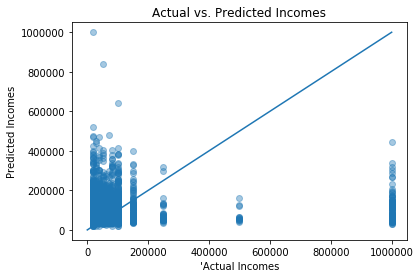

In [41]:
#2) K-Nearest Neighbor Regressor Model:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors=10, weights='distance')
regressor.fit(X_train, y_train)

y_predict = regressor.predict(X_test)

plt.scatter(y_test, y_predict, alpha=0.4)
plt.plot(range(max(feature_labels)), range(max(feature_labels)))
plt.xlabel("'Actual Incomes")
plt.ylabel("Predicted Incomes")
plt.title("Actual vs. Predicted Incomes")
plt.show()